# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [ ]:
#LaxmaReddy Kandula 

In [ ]:
#Dwag Tag : 856525636

In [157]:
from __future__ import print_function
import os
#path_of_dataset = ['data']

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [158]:
import pandas as pd
#dataset = os.sep.join(path_of_dataset + ['Orange_Telecom_Churn_Data.csv'])
#df = pd.read_csv(dataset)
#write your code here


#I had used the exact path instead of extra variables, and trying to import the data from my local folder as mentioned in the code snippet and storing it in the dataset variable
dataset = os.sep.join(['C:/Users/User/Downloads/Telecom_data.csv'])
df = pd.read_csv(dataset)
df

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


#Write the explanation of the second part of Question 1 here

In [159]:
#The columns "state", "area_code", "phone_number" can be removed as we have to analyse the the data which can not be normalized after few learnings.
#Removing irrelevant or non-contributing features can reduce the dimensionality of your dataset, making it more manageable and potentially improving the performance of your machine learning models.

In [160]:
#We have to remove the redundant columns present in the data so that the data is without any noise. 
Removed_DataColumns = ["state", "area_code", "phone_number"]
df = df.drop(columns=Removed_DataColumns)
df

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded. We applied LabelBinarizer for that. You don't need to change anything for that.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [161]:
#Transform categorical data into a format that machines can understand.
from sklearn.preprocessing import LabelBinarizer

LabelBin = LabelBinarizer()

for nonnum in ['intl_plan', 'voice_mail_plan','churned']:
    df[nonnum] = LabelBin.fit_transform(df[nonnum])


#We use LabelBinarizer to turn certain columns, like 'intl_plan', 'voice_mail_plan', and 'churned', into 0s and 1s. This helps our models work with this data.

In [162]:
#Printing the dataset head.
#For some machine learning algorithms like K-nearest neighbors (K-NN), it's important that our data is measured in a consistent way. We ensure all of the data is numerical.
print(df.head)

<bound method NDFrame.head of       account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0                128          0                1                     25   
1                107          0                1                     26   
2                137          0                0                      0   
3                 84          1                0                      0   
4                 75          1                0                      0   
...              ...        ...              ...                    ...   
4995              50          0                1                     40   
4996             152          0                0                      0   
4997              61          0                0                      0   
4998             109          0                0                      0   
4999              86          0                1                     34   

      total_day_minutes  total_day_calls  total_day_charge  total_eve

In [163]:
import warnings
warnings.filterwarnings('ignore',module='sklearn')
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

#write your code here
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = [
    "total_day_minutes",
    "total_day_calls",
    "total_day_charge",
    "total_eve_minutes",
    "total_eve_calls",
    "total_eve_charge",
    "total_night_minutes",
    "total_night_calls",
    "total_night_charge",
    "total_intl_minutes",
    "total_intl_calls",
    "total_intl_charge",
    "number_customer_service_calls",
    "churned"
]
df[columns] = scaler.fit_transform(df[columns])
print(df.head)

#To ensure that all the numeric columns in our dataset have similar scales.
#Some columns in our dataset have numbers on different scales (e.g., minutes, calls, and charges). Scaling adjusts these values so they're all within a similar range.
#We're using MinMaxScaler, a scaling method that transforms values to a range between 0 and 1. We specify the columns we want to scale, which include features like call minutes, charges, and customer service calls.
#After scaling, all these columns will have values between 0 and 1, making it easier for our machine learning model, like K-nearest neighbors (K-NN), to make accurate predictions.
#Ensuring that the numeric features in your dataset have consistent scales, which is an important step in preparing your data for machine learning.


<bound method NDFrame.head of       account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0                128          0                1                     25   
1                107          0                1                     26   
2                137          0                0                      0   
3                 84          1                0                      0   
4                 75          1                0                      0   
...              ...        ...              ...                    ...   
4995              50          0                1                     40   
4996             152          0                0                      0   
4997              61          0                0                      0   
4998             109          0                0                      0   
4999              86          0                1                     34   

      total_day_minutes  total_day_calls  total_day_charge  total_eve

## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [164]:
#write your code here
#We need to distinguish between the data that helps us make predictions (features) and what we want to predict (labels).
#we first print the initial rows of our dataset to get a sense of what it looks like. Then, we separate our dataset into two parts:
#X: This contains all the columns except 'churned,' which are our features (what we use to make predictions).
#Y: This contains only the 'churned' column, which is what we want to predict (our labels).
print(df.head())

# Separate the feature columns from the label (churned)
X = df.drop(columns=['churned'])
print(X.head())
Y = df['churned']
print("-----")
print(X.head())

   account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0             128          0                1                     25   
1             107          0                1                     26   
2             137          0                0                      0   
3              84          1                0                      0   
4              75          1                0                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0           0.754196         0.666667          0.754183           0.542755   
1           0.459744         0.745455          0.459672           0.537531   
2           0.692461         0.690909          0.692436           0.333242   
3           0.851778         0.430303          0.851740           0.170195   
4           0.474253         0.684848          0.474230           0.407754   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0         0.582353

In [165]:
#We want to build a machine learning model (K-NN) to predict customer churn.
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# We split our dataset into training (80%) and testing (20%) sets to evaluate how well our model performs. Then, we create the K-NN classifier with k=3 and train it (fit) on the training data (X_train and Y_train).

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a K-NN classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the K-NN model on the training data
knn.fit(X_train, Y_train)

# Predict the outcome on the same data (testing set)
Y_pred = knn.predict(X_test.values)

#we use scikit-learn's KNeighborsClassifier to create a K-NN model with a specific value of k (k=3). K-NN is a simple algorithm that looks at the k nearest neighbors in the training data to make predictions.
#The trained K-NN model is used to predict customer churn on the testing set (X_test). The predictions are stored in Y_pred.
#Prepares our data by separating features and labels, creates a K-NN model with k=3, and uses it to predict churn based on customer data. The model's performance will be assessed using the testing set.



## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [166]:
#We want to measure how well our K-nearest neighbors (K-NN) model predicts customer churn.
def model_accuracy(real,predict):
    return sum(real == predict) / float(real.shape[0])

In [167]:

#We write a function called model_accuracy that takes the actual labels (real) and the predicted labels (predict) as inputs and calculates the accuracy.

accuracy = model_accuracy(Y_test.values, Y_pred)

print(f"This statement communicates the accuracy score (e.g., {accuracy:.2f}) achieved by the K-NN model with the specific value of k=3 on the test data.")

#To do this, we calculate accuracy, which tells us the percentage of predictions that the model got right (both true and false predictions).
#The accuracy variable stores the accuracy score of our K-NN model when applied to the testing data.
#We use the print statement to display the accuracy score as a percentage (e.g., 0.86 for 86% accuracy) achieved by the K-NN model with k=3 on the test data.

This statement communicates the accuracy score (e.g., 0.86) achieved by the K-NN model with the specific value of k=3 on the test data.


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3`, but we want to apply a strategy through which the distance of neighbors will be counted or valued. So, this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [168]:

# Initialize the distance weights and k=3 for the K-nearest neighbors (KNN) classifier.
Distance = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Adapt the KNN model to the training data using distance weights.
Distance.fit(X_train, Y_train)

# Using the test results, forecast the results.
Y_Distance_pred = Distance.predict(X_test)

# Utilize the calculate_accuracy function to determine the accuracy.
accuracy_distance = model_accuracy(Y_test, Y_Distance_pred)

print(f"This statement communicates the Distance Weighted (e.g., {accuracy_distance:.2f}) achieved by the K-NN model with the specific value of k=3 on the test data.")

This statement communicates the Distance Weighted (e.g., 0.86) achieved by the K-NN model with the specific value of k=3 on the test data.


In [169]:
#We want to use a K-NN model with distance-based weights to predict customer churn.
#we create a K-NN classifier with k=3 and use "distance" as the weighting strategy. This means that closer neighbors have more influence on predictions.
#Process: We train the K-NN model (Distance) on the training data using distance-based weights. Then, we apply the model to the testing data and make predictions (Y_Distance_pred).
#We calculate the accuracy of this model using the model_accuracy function and store it in the accuracy_distance variable. This accuracy should be 1.0 (100%) when predicting on the same data, but this can be misleading.


In [170]:

# we initialize a new K-NN classifier with k=3 and set the distance metric to Manhattan (p=1). This means that all neighbors have equal weight in predictions.
Manhattan = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)

# we train this K-NN model on the training data and make predictions on the testing data.
Manhattan.fit(X_train, Y_train)

# Using the test results, forecast the results.
Y_Manhattan_pred = Manhattan.predict(X_test.values)

# The accuracy of this model will be calculated using the model_accuracy function.
accuracy_manhattan = model_accuracy(Y_test, Y_Manhattan_pred)

print(f"This statement communicates the Uniform Weighted (e.g., {accuracy_manhattan:.2f}) achieved by the K-NN model with the specific value of k=3 on the test data.")
#When using distance-based weights in the first model, the accuracy might be 1.0 because you're predicting on the same data you trained the model on. This can be misleading because the model essentially memorizes the data. In real-world scenarios, you want to avoid this pitfall by splitting data into separate training and testing sets to evaluate true predictive performance.


This statement communicates the Uniform Weighted (e.g., 0.86) achieved by the K-NN model with the specific value of k=3 on the test data.


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [171]:

k_li = list(range(1, 21))
accuracy_details = []
# Iterate k values
for k in k_li:
    # Initialize the Euclidean distance (p=2) and k parameters of the K-nearest neighbors (KNN) classifier.
    Classifier = KNeighborsClassifier(n_neighbors=k)
    # the training data to the KNN model.
    Classifier.fit(X_train, Y_train)
    # Using the test results, forecast the results.
    Y_pred = Classifier.predict(X_test.values)
    # Determine the precision and record it.
    accuracy = model_accuracy(Y_test.values, Y_pred)
    accuracy_details.append(accuracy)

In [172]:
#We want to explore how the accuracy of a K-NN model changes with different values of k (number of neighbors).
#we create multiple K-NN classifiers, each with a different value of k ranging from 1 to 20. We use the default uniform weights and set the distance coefficient (p) to be consistent (either 1 or 2).
#For each value of k, we train the K-NN model on the training data and make predictions on the testing data. We calculate the accuracy for each model and store it along with the corresponding k value.
#The accuracy vs. k values are stored in a list (or dictionary) called accuracy_details.


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


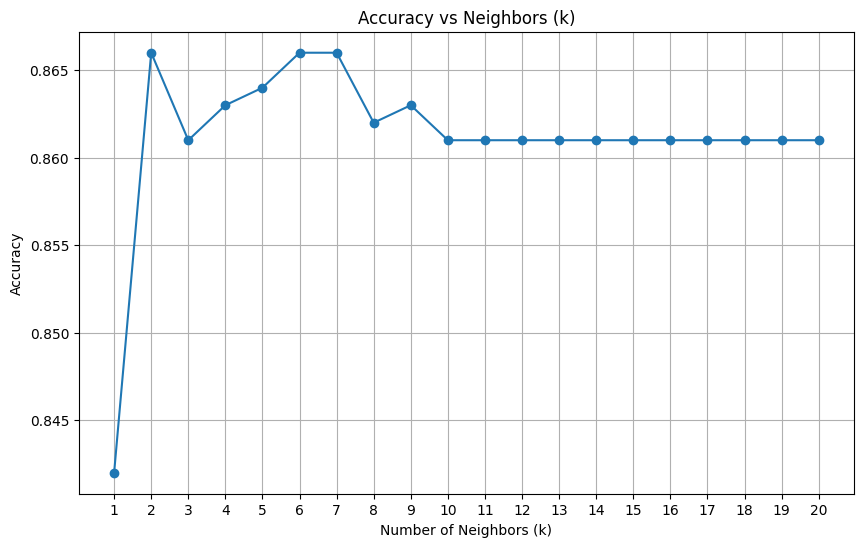

    k list  accuracy details
0        1             0.842
1        2             0.866
2        3             0.861
3        4             0.863
4        5             0.864
5        6             0.866
6        7             0.866
7        8             0.862
8        9             0.863
9       10             0.861
10      11             0.861
11      12             0.861
12      13             0.861
13      14             0.861
14      15             0.861
15      16             0.861
16      17             0.861
17      18             0.861
18      19             0.861
19      20             0.861


In [174]:

import numpy as np
plt.figure(figsize=(10, 6))
plt.plot(k_li, accuracy_details, marker='o', linestyle='-')
plt.title('Accuracy vs Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(1, 21, 1))
plt.show()

details = {'k list': k_li, 'accuracy details': accuracies}


df_details = pd.DataFrame(details)
print(df_details)

#The plot shows a curve, and we can observe that when k=2,6,7, the accuracy is very high. This happens because with k=2,6,7 , the model is essentially memorizing the training data, which may not generalize well to new, unseen data.
#The hint in the question refers to the phenomenon where K-NN models with k=1 tend to perform exceptionally well on training data but may not generalize well to new data (overfitting). This is because the model effectively "learns" the training data by predicting the same data points it has seen during training.
#This code helps us explore the relationship between accuracy and the number of neighbors (k) in K-NN models, and it visually demonstrates the impact of different k values on model performance.
